In [1]:
import imageio
# imageio.plugins.ffmpeg.download()
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import pliers
from os.path import join

from pliers.stimuli import VideoStim
from pliers.graph import Graph
from pliers.filters import FrameSamplingFilter
from pliers.extractors import (FaceRecognitionFaceLocationsExtractor,
                               FaceRecognitionFaceEncodingsExtractor,
                               MicrosoftAPIFaceExtractor,
                               GoogleVisionAPIFaceExtractor,
                               merge_results)

from pliers.converters import VideoToAudioConverter

In [10]:
%env GOOGLE_APPLICATION_CREDENTIALS="/Users/finnes/Documents/HCP_7T/7T_movie_stimulus/feature_extraction/My First Project-4a72ac337345.json"

env: GOOGLE_APPLICATION_CREDENTIALS="/Users/finnes/Documents/HCP_7T/7T_movie_stimulus/feature_extraction/My First Project-4a72ac337345.json"


In [43]:
vid_name = '7T_MOVIE4_HO2_v2'
video = VideoStim('/Users/finnes/Documents/HCP_7T/7T_movie_stimulus/Post_20140821_version/' + vid_name + '.mp4')

sampler = FrameSamplingFilter(hertz=2)
frames = sampler.transform(video)

# face_ext = GoogleVisionAPIFaceExtractor()
face_ext = FaceRecognitionFaceLocationsExtractor()
# face_ext = FaceRecognitionFaceEncodingsExtractor()
face_result = face_ext.transform(frames)

Stim: 1802it [11:03,  2.86it/s]


In [44]:
result_df = [f.to_df() for f in face_result]

result_df = pd.concat(result_df)

result_df.head(10)

,order,duration,onset,object_id,face_locations
0,NaN,0.5,45.5,0,"(334, 809, 370, 773)"
0,NaN,0.5,62.5,0,"(322, 562, 477, 408)"
0,NaN,0.5,63.5,0,"(354, 57, 390, 21)"
0,NaN,0.5,75.5,0,"(266, 736, 489, 513)"
0,NaN,0.5,76.0,0,"(231, 765, 498, 498)"
0,NaN,0.5,76.5,0,"(231, 765, 498, 498)"
0,NaN,0.5,77.0,0,"(206, 812, 527, 491)"
0,NaN,0.5,77.5,0,"(206, 812, 527, 491)"
0,NaN,0.5,78.0,0,"(260, 765, 528, 498)"
0,NaN,0.5,78.5,0,"(291, 736, 514, 513)"


In [45]:
import numpy as np
time = np.arange(0,921,0.5)

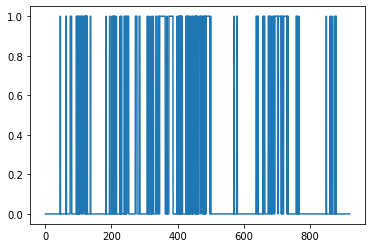

In [46]:
plt.plot(time, [t in result_df["onset"].values for t in time])

In [47]:
result_df.to_csv('/Users/finnes/Documents/HCP_7T/7T_movie_stimulus/feature_extraction/FaceExtractor_' + vid_name + '.csv', index = False)